# Project-2: Investigate a Dataset 

# No-show medical appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data cleaning</a></li>   
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset gives information about 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The analysis is focused on finding trends influencing patients to show or not show up to appointments.
- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

The original problem description and data set can be found here: https://www.kaggle.com/joniarroba/noshowappointments/home

## Research question

1.  What is the overall appointment show-up vs. no show-up count?

2.  What are the most feature that matter the most of ('Age', 'being alcoholic','Having an SMS', 'Gender', 'Scholarship'), to make the patient make it to his appiontment?


In [1]:
# Importing the necessary libraries to perform the data analysis
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv(f)
        return reader

In [39]:
# for creating the histogram for analysis
def hist(data, colors):
    total = data.values
    sns.distplot(data, color=colors);
    plt.title("Histogram")
    plt.ylabel("No. of appointments")

<a id='wrangling'></a>
## Data Wrangling

We will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 


In [4]:
# Load your data and print out a few lines.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(110527, 14)

In [6]:
# this returns the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
# this displays a concise summary of the dataframe, including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# this returns the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# this returns useful descriptive statistics for each column of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
# check for duplicates in the data
sum(df.duplicated())

0

#### The following changes should be made to get the cleaned data for analysis:

1. Rename the column names.
2. Change Appointment_day and Schedule_day to datetime format.
3. Change Patient_id type from float to int.
4. Transform the data type of the no_show field to integer (0,1) for (no,yes)
5. Age outliers were removed. It is observed that there are appointments for ages below -1 and above 100 which seemed to be unrealistic.
6. Awaiting_period column is added which is the number of days between Scheduling date and appointment date. 
7. Dropping the unecessary columns.

<a id='cleaning'></a>
## Data Cleaning 

#### 1. Rename the column names:

In [11]:
df.rename(columns = {'PatientId': 'Patient_id','AppointmentID': 'Appointment_id','ScheduledDay': 'Scheduled_Day','AppointmentDay': 'Appointment_Day',
                     'Hipertension': 'Hypertension','Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

df.head()

,Patient_id,Appointment_id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2. Change Appointment_day and Schedule_day to datetime format:

In [12]:
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day']).dt.date.astype('datetime64')
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day']).dt.date.astype('datetime64')

# Check if the type is now datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_id         110527 non-null float64
Appointment_id     110527 non-null int64
Gender             110527 non-null object
Scheduled_Day      110527 non-null datetime64[ns]
Appointment_Day    110527 non-null datetime64[ns]
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_show            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


#### 3. Change Patient_id type from float to int:

In [13]:
df['Patient_id'] = df['Patient_id'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_id         110527 non-null int64
Appointment_id     110527 non-null int64
Gender             110527 non-null object
Scheduled_Day      110527 non-null datetime64[ns]
Appointment_Day    110527 non-null datetime64[ns]
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


#### 4. Transform the data type of the No_show field to integer (0,1) for (no,yes):

In [14]:
df.No_show = df.No_show.eq('Yes').mul(1)


#### 5. Age outliers were removed. It is observed that there are appointments for ages below -1 and above 100 which seemed to be unrealistic:

In [15]:
df = df[(df.Age >= 0) & (df.Age <= 100)]
df.shape

(110519, 14)

#### 6. Awaiting _period is the number of days between Scheduling date and appointment date. The coulumn is added for further analysis

In [16]:
df['Awaiting_period'] = df["Appointment_Day"].sub(df["Scheduled_Day"], axis=0)
df["Awaiting_period"] = (df["Awaiting_period"] / np.timedelta64(1, 'D')).abs()
df.head()

,Patient_id,Appointment_id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Awaiting_period
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0.0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0.0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0.0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0.0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0.0


#### 7. Making the Handicap values to '0' & '1' 
The value distribution implies differentiations of the handicap-degree. 0 appears to be no handicap. The amounts of each degree are quite low, especially from degree 2 on. For the porpuse of analysis, we shall copy that column and combine the values of degree 1 to 4 to "1 = handicap".

In [17]:
df['Handicap'] = df['Handicap'].astype('bool')
df['Handicap'].value_counts()

False    108282
True       2237
Name: Handicap, dtype: int64

#### 8. Dropping the unecessary columns:
Patient_id, Schedule_day and Appointment_Day are dropped as the No_show analysis id done across other variables.

In [18]:
df.drop(['Patient_id'], axis=1, inplace=True)
df.head()

,Appointment_id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Awaiting_period
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,False,0,0,0.0
1,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,False,0,0,0.0
2,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,False,0,0,0.0
3,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,False,0,0,0.0
4,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,False,0,0,0.0


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What is the overall appointment show-up vs. no show-up count?)

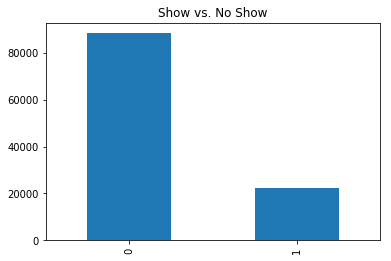

In [19]:
show = df['No_show'].value_counts()
show.plot(kind='bar', title='Show vs. No Show');

##### Based on the above bar graph, we can say that most patients did arrive for their appointments.

### Research Question 2  (What are the most feature that matter the most to make the patient make it to his appiontment?)
Factors to be considered to examine for analysis:
1. Gender
2. Age
3. Scholarship
4. Disease
5. SMS_received
6. Awaiting_period
7. Neighbourhood

### 1. Gender

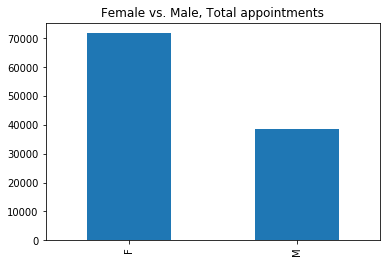

In [20]:
Gender = df['Gender'].value_counts()
Gender.plot(kind = 'bar', title = 'Female vs. Male, Total appointments');

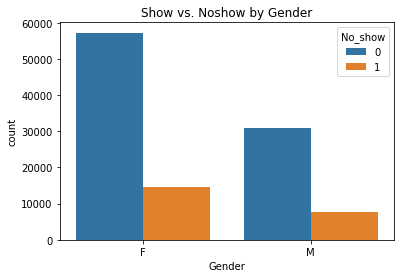

In [21]:
x = sns.countplot(x=df.Gender, hue = df.No_show, data = df)
x.set_title('Show vs. Noshow by Gender')
plt.show()

##### The total number of appointments shows that there is almost twice as many female patients as male patients. So as the show and noshow count. This doesnt significantly show any trend or reason for noshows.

### 2.Age

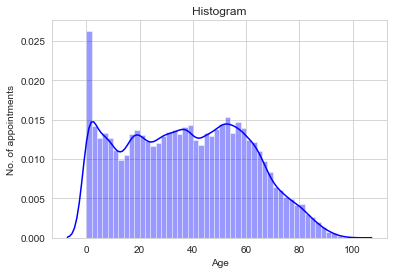

In [40]:
#histogram for the age 
hist(df.Age, "b")

In [41]:
#Categorize agesfor further analysis.
bins = [0, 18, 35, 65, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Elderly']
age_groups = pd.cut(df.Age, bins, right=False, labels=labels)
df['Age_Group'] = age_groups

In [42]:
group_count = df.Age_Group.value_counts()
group_count

Adult          44499
Child          27379
Young Adult    24246
Elderly        14391
Name: Age_Group, dtype: int64

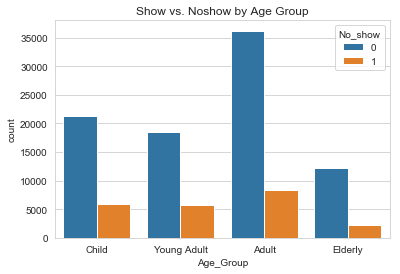

In [43]:
x = sns.countplot(x=df.Age_Group, hue = df.No_show, data = df)
x.set_title('Show vs. Noshow by Age Group')
plt.show()

##### The majority of patients are between the ages of 0 and 55, with an average patient age of 37. Also, these values did not change after the outliers were removed.
##### Classifying by Age Group shows that children and young adults are less likely to show up for an appointment than adults. Elderly have the least number of overall appointments but do seem to have a higher tendency to not show up for an appointment.

### 3. Scholarship

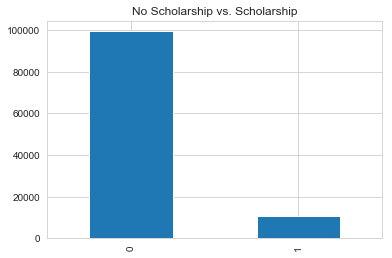

In [44]:
S_count = df.Scholarship.value_counts()
S_count.plot(kind = 'bar', title = 'No Scholarship vs. Scholarship');

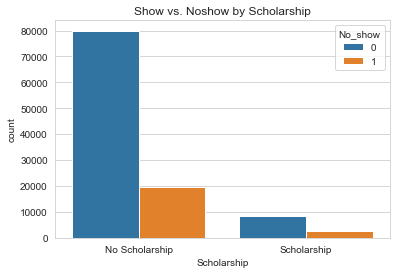

In [45]:
x = sns.countplot(x=df.Scholarship, hue = df.No_show, data = df)
x.set_title('Show vs. Noshow by Scholarship')
labels=['No Scholarship', 'Scholarship']
x.set_xticklabels(labels)
plt.show()

##### Only 10% of patients received funding for medical services.
##### Scholarship factor did not seem to havve any effect on show up or no show up rate. 

### 4. Diseases

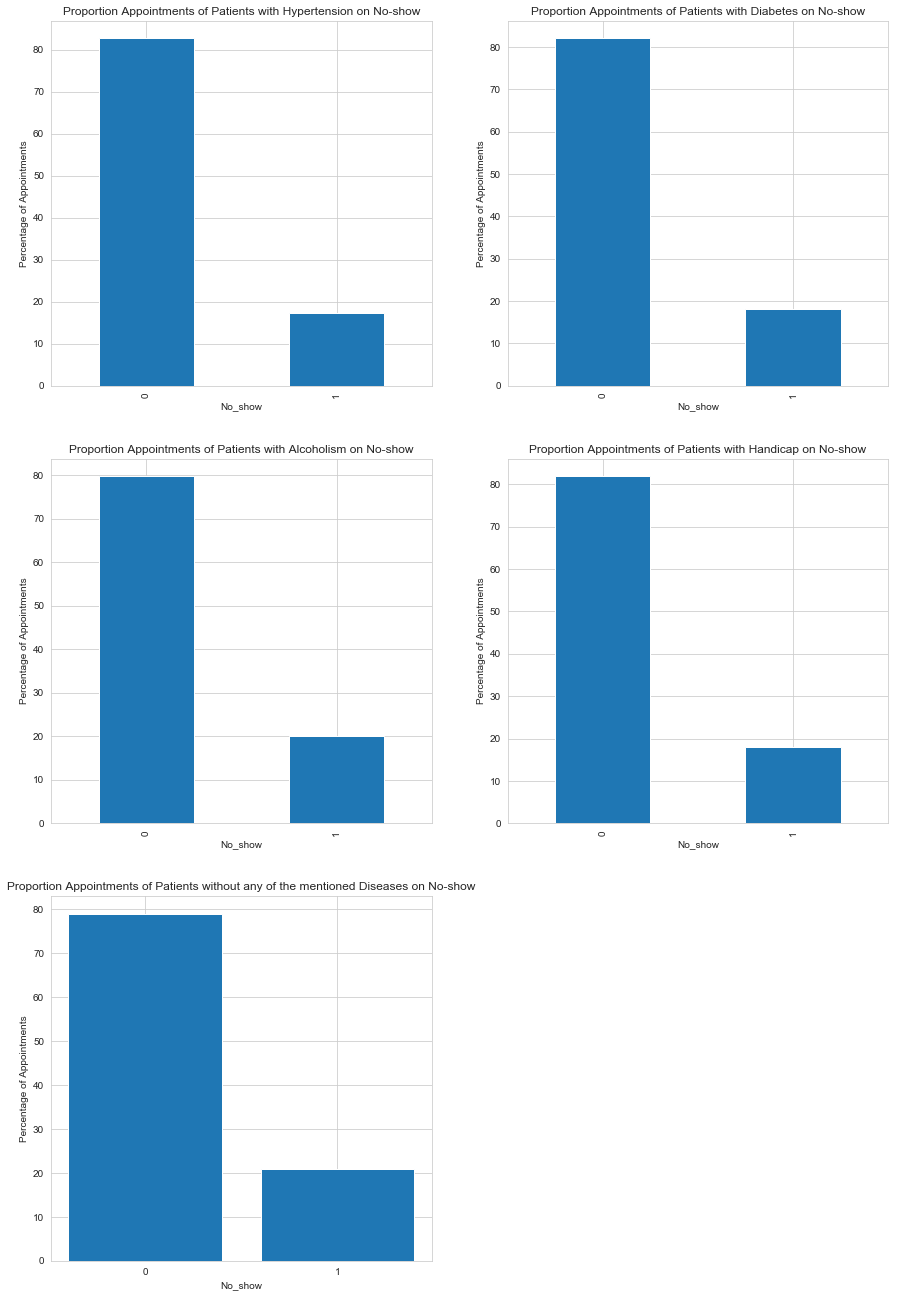

In [46]:
#For comparison, extracting patients without a stated disease into separate dataframes.
no_disease_show = df[(df['No_show'] == False) & (df['Hypertension'] == False) & (df['Diabetes'] == False) & 
                             (df['Alcoholism'] == False) & (df['Handicap'] == False)]
no_disease_no_show = df[(df['No_show'] == True) & (df['Hypertension'] == False) & (df['Diabetes'] == False) & 
                            (df['Alcoholism'] == False) & (df['Handicap'] == False)]


#Calculation the total amounts of appointments per disease for proportion calculuation later on.
total_no_disease = no_disease_show['Appointment_Day'].count() + no_disease_no_show['Appointment_Day'].count()
total_Hypertension = sum(df.groupby(['No_show']).sum()['Hypertension'])
total_Diabetes = sum(df.groupby(['No_show']).sum()['Diabetes'])
total_Alcoholism = sum(df.groupby(['No_show']).sum()['Alcoholism'])
total_Handicap = sum(df.groupby(['No_show']).sum()['Handicap'])

#Calculation the proportions of No-show and Show-up per disease and for no-disease
Hypertension = df.groupby(['No_show']).sum()['Hypertension']/total_Hypertension *100
Diabetes = df.groupby(['No_show']).sum()['Diabetes']/total_Diabetes * 100
Alcoholism = df.groupby(['No_show']).sum()['Alcoholism']/total_Alcoholism * 100
Handicap = df.groupby(['No_show']).sum()['Handicap']/total_Handicap * 100
no_disease_show_proportion = no_disease_show['Appointment_Day'].count() / total_no_disease * 100
no_disease_no_show_proportion = no_disease_no_show['Appointment_Day'].count() / total_no_disease * 100

#Plotting results of calculations above.
# Styling the graphs
fig = plt.figure(figsize=(15,55)) 
sns.set_style('whitegrid')

# Defining the graphs
plt.subplot(7,2,1)
Hypertension.plot.bar()
plt.title('Proportion Appointments of Patients with Hypertension on No-show')
plt.xlabel('No_show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,2)
Diabetes.plot.bar()
plt.title('Proportion Appointments of Patients with Diabetes on No-show')
plt.xlabel('No_show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,3)
Alcoholism.plot.bar()
plt.title('Proportion Appointments of Patients with Alcoholism on No-show')
plt.xlabel('No_show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,4)
Handicap.plot.bar()
plt.title('Proportion Appointments of Patients with Handicap on No-show')
plt.xlabel('No_show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,5)
plt.bar(["0","1"], [no_disease_show_proportion, no_disease_no_show_proportion]);
plt.title('Proportion Appointments of Patients without any of the mentioned Diseases on No-show')
plt.xlabel('No_show')
plt.ylabel('Percentage of Appointments');


##### The graphs above show the proportions of appointments with no-show per disease.

##### The patients without any diseases seem to have not showed up highly for their appointment.  The lowest has the group of patients with a handicap. The rest of the people with diabetes, hypertension and alcoholism seem to be having less no show to the appointments.

### 5. SMS_RECEIVED

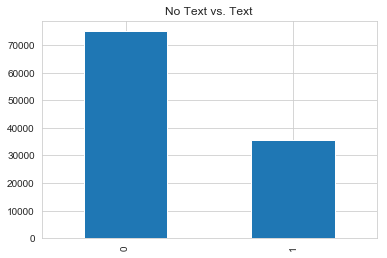

In [47]:
txt = df.SMS_received.value_counts()
txt.plot(kind = 'bar', title = 'No Text vs. Text');

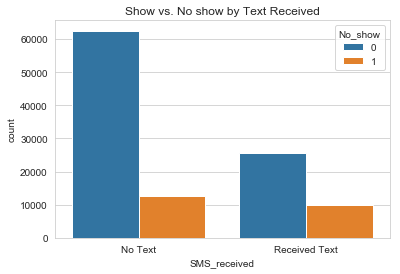

In [48]:
x = sns.countplot(x=df.SMS_received, hue = df.No_show)
x.set_title('Show vs. No show by Text Received')
labels=['No Text', 'Received Text']
x.set_xticklabels(labels)
plt.show()

##### Approximately one-third of patients received a text reminder of their appointment. 
##### Surprisingly it appeared that patients who received a text reminder were less likely to show up for an appointment than those who did not receive a text.

### 6. Awaiting_period

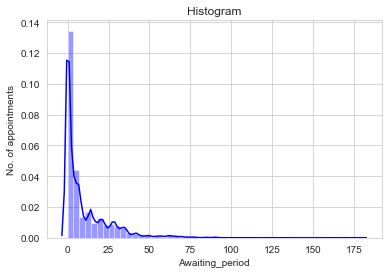

In [49]:
#Histogram for the wait time between scheduled day and appointment day for all samples.
#calling the function hist()
hist(df.Awaiting_period, "b")

In [50]:
#Categorize wait times by timeperiod for further analysis.
bins = [0, 1, 15, 31, 91, 200]
labels = ['Same Day', '1 - 14 Days', '15 - 30 Days', '31 - 90 Days', '> 90 Days']
wait_period = pd.cut(df.Awaiting_period, bins, right=False, labels=labels)
df['Awaiting_period'] = wait_period

In [51]:
df.Awaiting_period.value_counts()

1 - 14 Days     44212
Same Day        38560
15 - 30 Days    17370
31 - 90 Days    10160
> 90 Days         217
Name: Awaiting_period, dtype: int64

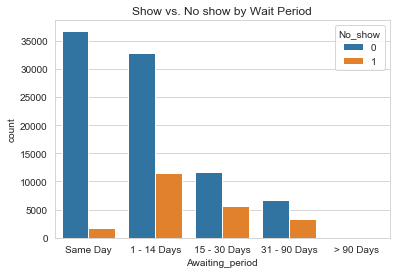

In [52]:
x = sns.countplot(x=df.Awaiting_period, hue = df.No_show, data = df)
x.set_title('Show vs. No show by Wait Period')
plt.show()

##### The most significant indicator of a patient showing up for an appointment appears to be wait time. Patients having appointment on same day as that of the scheduled day seem to have showed up perfectly. At 15 days and beyond we see a significant shift in no shows.

### 7. Neighbourhood

In [53]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5804
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2258
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1976
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

##### I have considered the first 20 locations which has more than 2000 appointments for the analysis purpose

In [54]:
#Create an index of the top 20 locations by total appointments.
top_20loc = df['Neighbourhood'].value_counts().head(20).index
top_20loc_count = df.Neighbourhood.value_counts().head(20)
top_20loc_count

JARDIM CAMBURI       7717
MARIA ORTIZ          5804
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
SANTO ANTÔNIO        2746
SANTO ANDRÉ          2571
CARATOÍRA            2565
JABOUR               2509
SÃO PEDRO            2448
ILHA DO PRÍNCIPE     2266
NOVA PALESTINA       2264
ANDORINHAS           2258
DA PENHA             2217
ROMÃO                2214
Name: Neighbourhood, dtype: int64

In [55]:
#Created a dataframe with just location and NoShow data for further analysis.
Neighbourhood = df[['Neighbourhood', 'No_show']]

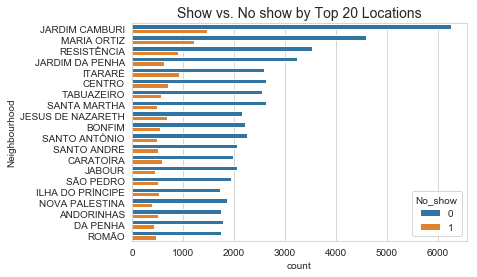

In [56]:
#Plot the top 20 locations by Show/No Show values.
x = sns.countplot(y=Neighbourhood.Neighbourhood, hue = Neighbourhood.No_show, data = Neighbourhood, order=top_20loc)
x.set_title('Show vs. No show by Top 20 Locations', fontsize=14)
plt.show()

#####  There did not seem to be any direct relationship between the neighbourhood and a patient not showing up from the above analysis.

<a id='conclusions'></a>
## Conclusions
In this project, the factors like age, gender, location, diseases, text message remainder, wait period and scholarship were considered to analyze the patients show and no show to the appointment.

Out of all the factors the only factor that showed possible reason for no show is the wait period. As the wait period is longer so as the rate of no shows. The data seemed to suggest that a patient was more likely to show up for an appointment if the schedule date and the appointment date were within 2 weeks.

Secondly, the factors like Age and Disease appeared to have slight significance. Children and yound adult age groups have slightly more rate of not showing up compared to other groups. Similarly no disease population seem to have more no shows compared to different diseased population.

## Limitations

The main observation in this investigation is that the quality of the data was not enough to state with certainty why a patient would or would not show up for an appointment.

More factors like, whether the patient is employed or unemployed or even the reason they scheduled an appointment could have been useful for proper analysis of this data.

Also, they are not enough details for certain factors to draw conclusions.
